In [1]:
import numpy as np
import random
import torch
from collections import defaultdict

import matplotlib.pyplot as plt

from dqn import DQNAgent

In [2]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

In [3]:
SEEDS = [0, 42, 5]

In [4]:
def average_dicts(dicts):
    avg = defaultdict(list)
    for d in dicts:
        for k, v in d.items():
            avg[k].append(v)
    # Take mean for each key
    return {k: np.mean(v) for k, v in avg.items()}

## CartPole

### LR

In [ ]:
lrs = [3e-3, 1e-3, 3e-4]
cp_results_lr = {}

for lr in lrs:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("lr = ", lr, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="CartPole-v1",
            hidden_dim=128,
            episodes=800,
            batch_size=64,
            num_steps=500,
            num_layers=2,
            learning_rate=lr,
            eval_interval=5,
            epsilon=1.0,
            tau = 1.0,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=0.99
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    cp_results_lr[f"LR={lr}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in cp_results_lr.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward")
plt.title("DQN Learning Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in cp_results_lr.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in cp_results_lr.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward")
plt.title("DQN Learning Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in cp_results_lr.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
lrs = [3e-3, 1e-3, 3e-4]
cpt_results_lr = {}

for lr in lrs:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("lr = ", lr, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="CartPole-v1",
            hidden_dim=128,
            episodes=800,
            batch_size=64,
            num_steps=500,
            num_layers=2,
            learning_rate=lr,
            eval_interval=5,
            epsilon=1.0,
            tau = 0.05,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=0.99
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    cpt_results_lr[f"LR={lr}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in cpt_results_lr.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward")
plt.title("DQN with Soft Update Learning Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in cpt_results_lr.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in cpt_results_lr.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward")
plt.title("DQN with Soft Update Learning Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in cpt_results_lr.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

### Eps Decay

In [ ]:
eps_decay_list = [0.99, 0.995, 0.999]
cp_results_eps = {}
agents = []

for eps_decay in eps_decay_list:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("eps_decay = ", eps_decay, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="CartPole-v1",
            hidden_dim=128,
            episodes=800,
            batch_size=64,
            num_steps=500,
            num_layers=2,
            learning_rate=1e-3,
            eval_interval=5,
            epsilon=1.0,
            tau = 1.0,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=eps_decay
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)
        agents.append(dqn_agent)

    avg_train_rewards = average_dicts(all_train_rewards)
    avg_eval_rewards = average_dicts(all_eval_rewards)

    cp_results_eps[f"eps_decay={eps_decay}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

eps_decay =  0.99 seed =  0


/Users/farida/PycharmProjects/RL_Project/.venv/lib/python3.12/site-packages/gymnasium/envs/classic_control/cartpole.py:214: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


eps_decay =  0.99 seed =  42
eps_decay =  0.99 seed =  5


In [ ]:
# Sort by step/episode in case the keys are not ordered
train_steps = sorted(cp_results_eps["eps_decay=0.99"]["avg_train_rewards"].keys())
train_values = [cp_results_eps["eps_decay=0.99"]["avg_train_rewards"][k] for k in train_steps]

eval_steps = sorted(cp_results_eps["eps_decay=0.99"]["avg_eval_rewards"].keys())
eval_values = [cp_results_eps["eps_decay=0.99"]["avg_eval_rewards"][k] for k in eval_steps]

plt.figure(figsize=(10, 6))

plt.plot(train_steps, train_values, label='Average Train Reward', color='blue')
plt.plot(eval_steps, eval_values, label='Average Eval Reward', color='orange')

plt.xlabel('Step / Episode')
plt.ylabel('Average Reward')
plt.title('Training and Evaluation Reward over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
eps_decay_list = [0.99, 0.995, 0.999]
cpt_results_eps = {}
agents = []

for eps_decay in eps_decay_list:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("eps_decay = ", eps_decay, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="CartPole-v1",
            hidden_dim=128,
            episodes=800,
            batch_size=64,
            num_steps=500,
            num_layers=2,
            learning_rate=1e-3,
            eval_interval=5,
            epsilon=1.0,
            tau = 0.05,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=eps_decay
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)
        agents.append(dqn_agent)

    avg_train_rewards = average_dicts(all_train_rewards)
    avg_eval_rewards = average_dicts(all_eval_rewards)

    cpt_results_eps[f"eps_decay={eps_decay}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
}

In [ ]:
# Sort by step/episode in case the keys are not ordered
train_steps = sorted(cpt_results_eps["eps_decay=0.99"]["avg_train_rewards"].keys())
train_values = [cpt_results_eps["eps_decay=0.99"]["avg_train_rewards"][k] for k in train_steps]

eval_steps = sorted(cpt_results_eps["eps_decay=0.99"]["avg_eval_rewards"].keys())
eval_values = [cpt_results_eps["eps_decay=0.99"]["avg_eval_rewards"][k] for k in eval_steps]

plt.figure(figsize=(10, 6))

plt.plot(train_steps, train_values, label='Average Train Reward', color='blue')
plt.plot(eval_steps, eval_values, label='Average Eval Reward', color='orange')

plt.xlabel('Step / Episode')
plt.ylabel('Average Reward')
plt.title('Training and Evaluation Reward over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
eps_decay_list = [0.99, 0.995, 0.999]
cpt0_results_eps = {}
agents = []

for eps_decay in eps_decay_list:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("eps_decay = ", eps_decay, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="CartPole-v1",
            hidden_dim=128,
            episodes=800,
            batch_size=64,
            num_steps=500,
            num_layers=2,
            learning_rate=1e-3,
            eval_interval=5,
            epsilon=1.0,
            tau = 0.0,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=eps_decay
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)
        agents.append(dqn_agent)

    avg_train_rewards = average_dicts(all_train_rewards)
    avg_eval_rewards = average_dicts(all_eval_rewards)

    cpt0_results_eps[f"eps_decay={eps_decay}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
}

In [ ]:
# Sort by step/episode in case the keys are not ordered
train_steps = sorted(cpt0_results_eps["eps_decay=0.99"]["avg_train_rewards"].keys())
train_values = [cpt0_results_eps["eps_decay=0.99"]["avg_train_rewards"][k] for k in train_steps]

eval_steps = sorted(cpt0_results_eps["eps_decay=0.99"]["avg_eval_rewards"].keys())
eval_values = [cpt0_results_eps["eps_decay=0.99"]["avg_eval_rewards"][k] for k in eval_steps]

plt.figure(figsize=(10, 6))

plt.plot(train_steps, train_values, label='Average Train Reward', color='blue')
plt.plot(eval_steps, eval_values, label='Average Eval Reward', color='orange')

plt.xlabel('Step / Episode')
plt.ylabel('Average Reward')
plt.title('Training and Evaluation Reward over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


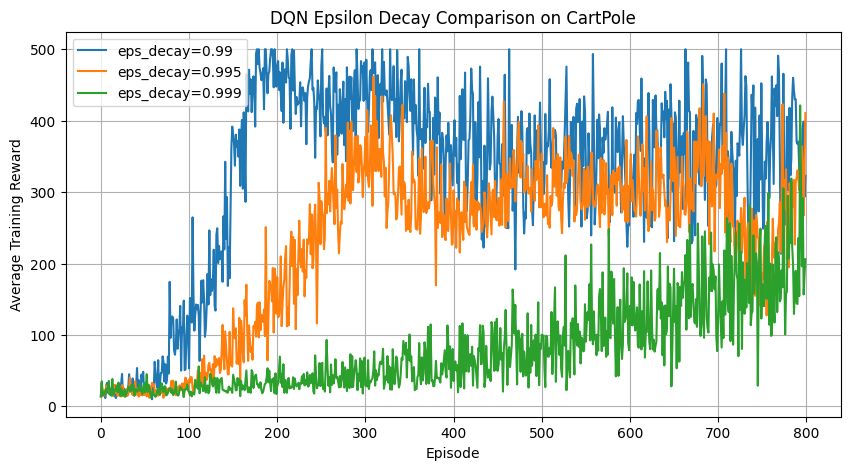

In [5]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in cp_results_eps.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward")
plt.title("DQN Epsilon Decay Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

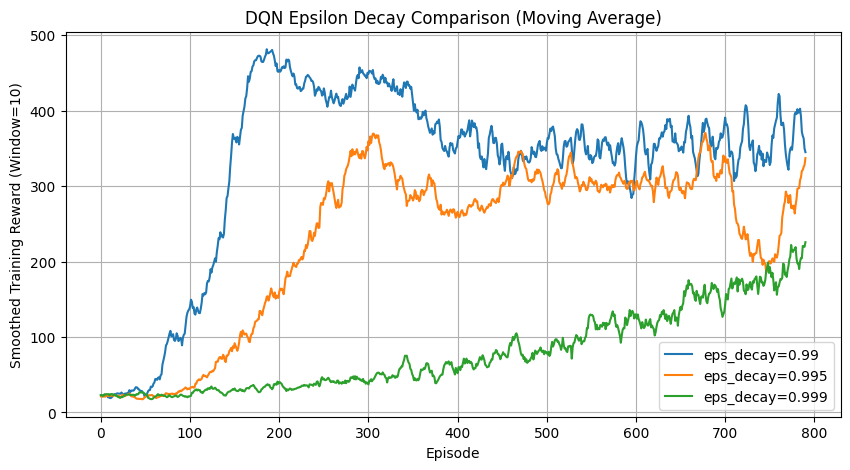

In [6]:
window_size = 10

plt.figure(figsize=(10, 5))
for lr, result in cp_results_eps.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Epsilon Decay Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

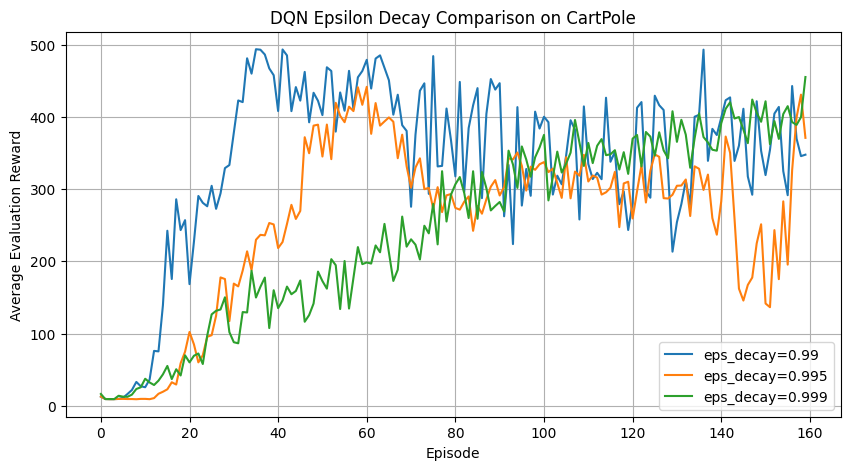

In [7]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in cp_results_eps.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward")
plt.title("DQN Epsilon Decay Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

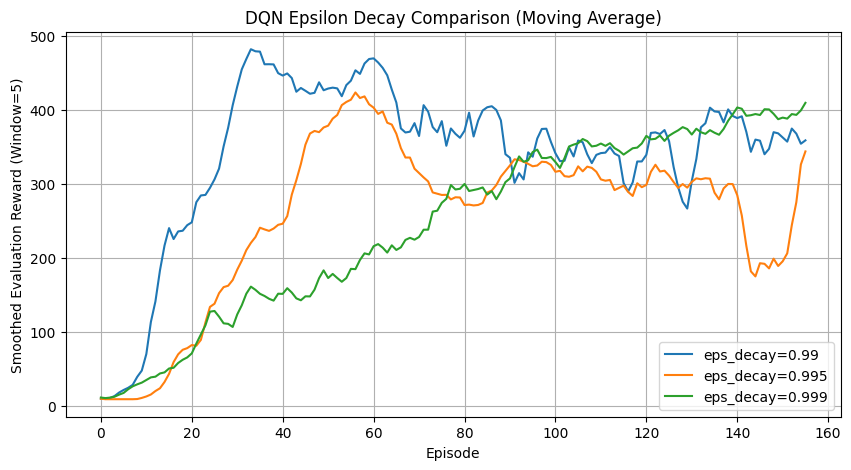

In [8]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in cp_results_eps.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Evaluation Reward (Window={window_size})")
plt.title("DQN Epsilon Decay Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [9]:
print(agents[0].best_reward_mean)
print(agents[0].best_reward_std)

497.4
11.333137253205752


In [10]:
print(agents[1].best_reward_mean)
print(agents[1].best_reward_std)

498.15
8.063963045550246


In [11]:
print(agents[2].best_reward_mean)
print(agents[2].best_reward_std)

497.4
10.451794104363138


## MountainCar Env

### Learning Rate

In [ ]:
lrs = [3e-3, 1e-3, 3e-4]
mc_results_lr = {}

for lr in lrs:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("lr = ", lr, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="MountainCar-v0",
            hidden_dim=128,
            episodes=2000,
            batch_size=64,
            num_steps=200,
            num_layers=4,
            learning_rate=lr,
            eval_interval=5,
            epsilon=1.0,
            tau = 1.0,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=0.995
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    mc_results_lr[f"LR={lr}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in mc_results_lr.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward")
plt.title("DQN Learning Rate Comparison on MountainCar")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in mc_results_lr.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in mc_results_lr.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward")
plt.title("DQN Learning Rate Comparison on MountainCar")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in mc_results_lr.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
lrs = [3e-3, 1e-3, 3e-4]
mct_results_lr = {}

for lr in lrs:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("lr = ", lr, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="MountainCar-v0",
            hidden_dim=128,
            episodes=2000,
            batch_size=64,
            num_steps=200,
            num_layers=4,
            learning_rate=lr,
            eval_interval=5,
            epsilon=1.0,
            tau = 0.05,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=0.995
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    mct_results_lr[f"LR={lr}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in mct_results_lr.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward")
plt.title("DQN Learning Rate Comparison on MountainCar")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in mct_results_lr.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in mct_results_lr.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward")
plt.title("DQN Learning Rate Comparison on MountainCar")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in mct_results_lr.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

After training, test the final policy over 10–20 episodes with no exploration noise
Compute:
Mean return
Standard deviation

In [ ]:
mean_reward, std_reward = agents[2].evaluate_policy()

In [ ]:
mean_reward, std_reward

 Off-Policy Data Efficiency (Buffer Experiments)

✅ What to Measure:
For off-policy methods (DQN, TD3, SAC), test:
Different replay buffer sizes
Different update-to-sample ratios (e.g., 1:1 vs. 10:1)
For PPO, try reusing old data (should degrade performance)
📈 How to Report:
Reward vs. buffer size or reuse amount
Show curves/tables to highlight sensitivity
🎯 Why:
Measures how well each method reuses past experience

Time per training step (computational efficiency)